In [ ]:
#1. Importing libraries
import pandas as pd
import numpy as np
import statistics as st
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sb

In [ ]:
dataset = pd.read_csv("train.csv",sep=',')
dataset.head()

In [ ]:
dataset.describe()

In [ ]:
#2. Cleaning "train.csv"

#Treating empty values

dataset.isnull().sum()

#Age column
empty = dataset['Age'].isna().sum()
median_age = dataset['Age'].median()
dataset['Age'] = dataset['Age'].fillna(median_age)
dataset.isnull().sum()

#Cabin column
cabin_grouped = dataset.groupby(dataset['Cabin']).size().sort_values(ascending=False)
most_common_values = ["C23 C25 C27","G6","B96 B98"] #group of most shown values on the dataset for Cabin
dataset['Cabin'] = dataset['Cabin'].fillna(pd.Series(np.random.choice(most_common_values,size=len(dataset.index))))
dataset.isnull().sum()

#Embarked
embarked_grouped = dataset.groupby(dataset['Embarked']).size() #S is the higher 
dataset['Embarked'] = dataset['Embarked'].fillna("S")
dataset.isnull().sum()

In [ ]:
#Checking for duplicated data in id
duplicated = dataset.duplicated().sum()

In [ ]:
#Checking for wrong values on columns we have values specified:

checking_survived = dataset.groupby(dataset['Survived']).size()
checking_survived

checking_pclass = dataset.groupby(dataset['Pclass']).size()
checking_pclass

checking_sex = dataset.groupby(dataset['Sex']).size()
checking_sex

C:\Users\Gabi Bello\AppData\Local\Temp\ipykernel_9340\133898921.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survived['age_1']=pd.cut(survived['Age'],bins=bins, labels=labels, right=False)
C:\Users\Gabi Bello\AppData\Local\Temp\ipykernel_9340\133898921.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survived_by_age = survived.groupby('age_1').size()
C:\Users\Gabi Bello\AppData\Local\Temp\ipykernel_9340\133898921.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

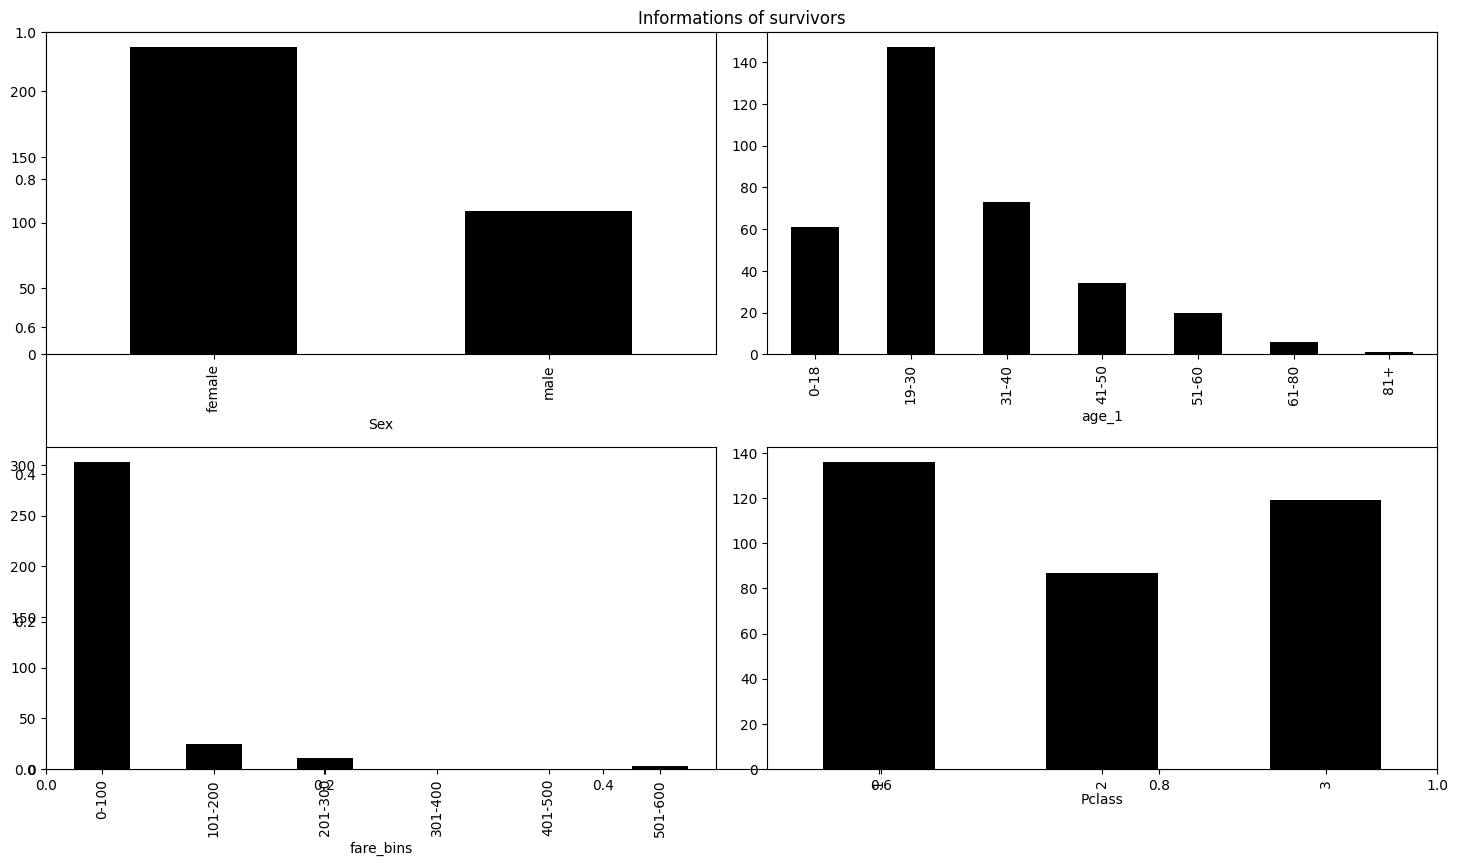

In [37]:
#Creating some graphs to understand our dataset
dataset.head()

'''Not interesting for graphs:
Name, Ticket, SibSp, Parch, PassengerId
'''

#Graph1: Sex x Survived
#Graph2: Ages x Survived
#Graph3: Fare x Survived
#Graph4: PClass x Survived

survived = (dataset[dataset['Survived'] == 1])
survived_by_sex = (survived).groupby('Sex').size()

bins = [0, 18, 30, 40, 50, 60, 80, float('inf')]
labels = ['0-18','19-30','31-40','41-50','51-60','61-80','81+']

survived['age_1']=pd.cut(survived['Age'],bins=bins, labels=labels, right=False)
survived_by_age = survived.groupby('age_1').size()

bins_fare = [0, 100, 200, 300, 400, 500, 600]
labels_fare = ['0-100','101-200','201-300','301-400','401-500','501-600']

survived['fare_bins'] = pd.cut(survived['Fare'],bins=bins_fare, labels=labels_fare, right=False)
survived_by_fare = survived.groupby('fare_bins').size()

pclass_survived = (survived).groupby('Pclass').size()

plt.figure(figsize=(15,9))
plt.title('Informations of survivors')
plt.subplot(2,2,1)
survived_by_sex.plot(kind='bar',color='black')
plt.subplot(2,2,2)
survived_by_age.plot(kind='bar',color='black')
plt.subplot(2,2,3)
survived_by_fare.plot(kind='bar',color='black')
plt.subplot(2,2,4)
pclass_survived.plot(kind='bar',color='black')

plt.tight_layout()

